In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


**df.head()** displays first five rows of our datasets.

In [3]:
os.chdir('/content/drive/My Drive/GitHub Repositories/Machine Learning Algorithms/PCA-Principal Component Analysis')
dataDir = './datasets'
df = pd.read_csv(os.path.join(dataDir, 'HR.csv'))
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**df.columns.tolist()** fetches all the columns and then convert it into list type. This step is just to check out all the column names in our data. Columns  are also called as features of our datasets.

In [4]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


**df.corr()** compute pairwise correlation of columns.Correlation shows how the two variables are related to each other. Positive values shows as one variable increases other variable increases as well. Negative values shows as one variable increases other variable decreases. Bigger the values more strongly two varibles are correlated and viceversa.

In [5]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


**Visualising correlation using Seaborn library**

Text(0.5, 1, 'Correlation between different fearures')

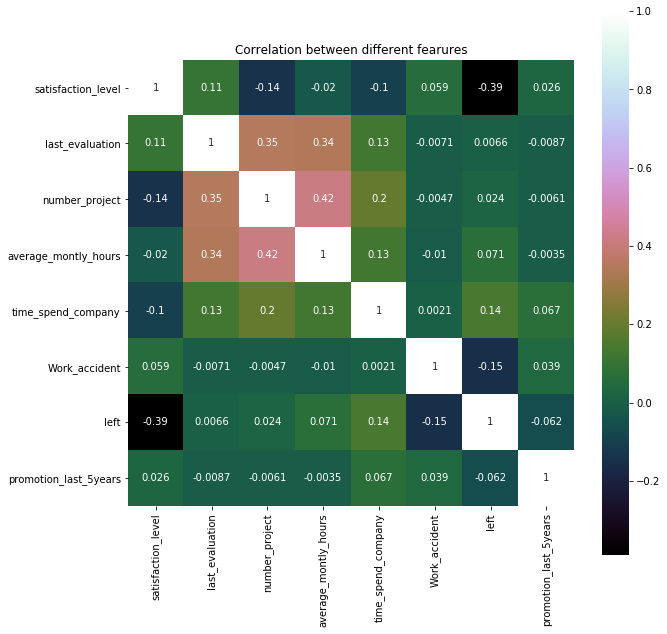

In [6]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

plt.title('Correlation between different fearures')

Printing all the unique values in **sales** columns

In [7]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
sales=df.groupby('sales').sum()
print(sales)

df['sales'].unique()

             satisfaction_level  last_evaluation  ...  left  promotion_last_5years
sales                                             ...                             
IT                       758.46           879.55  ...   273                      3
RandD                    487.80           560.44  ...   121                     27
accounting               446.51           550.49  ...   204                     14
hr                       442.52           523.84  ...   215                     15
management               391.45           456.12  ...    91                     69
marketing                530.76           614.23  ...   203                     43
product_mng              558.91           644.71  ...   198                      0
sales                   2543.81          2938.23  ...  1014                    100
support                 1378.19          1611.81  ...   555                     20
technical               1653.48          1961.39  ...   697                     28

[10

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
groupby_sales=df.groupby('sales').mean()
groupby_sales

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [11]:
IT=groupby_sales['satisfaction_level'].IT
RandD=groupby_sales['satisfaction_level'].RandD
accounting=groupby_sales['satisfaction_level'].accounting
hr=groupby_sales['satisfaction_level'].hr
management=groupby_sales['satisfaction_level'].management
marketing=groupby_sales['satisfaction_level'].marketing
product_mng=groupby_sales['satisfaction_level'].product_mng
sales=groupby_sales['satisfaction_level'].sales
support=groupby_sales['satisfaction_level'].support
technical=groupby_sales['satisfaction_level'].technical
technical

0.6078970588235295

Text(0.5, 1.0, 'Mean Satisfaction Level of each department')

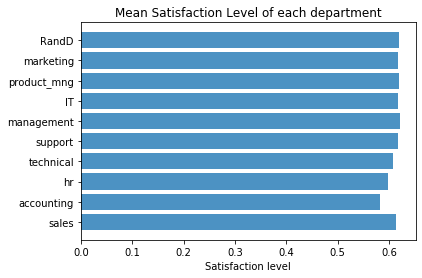

In [13]:
department_name=('sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD')
department=(sales, accounting, hr, technical, support, management, IT, product_mng, marketing, RandD)
y_pos = np.arange(len(department))
x=np.arange(0,1,0.1)

plt.barh(y_pos, department, align='center', alpha=0.8)
plt.yticks(y_pos,department_name )
plt.xlabel('Satisfaction level')
plt.title('Mean Satisfaction Level of each department')

# **Principal Component Analysis**

In [14]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**df.drop()** is the method to drop the columns in our dataframe.

Bring **left** column to the front as it is the label and not the feature.

In [15]:
df_drop=df.drop(labels=['sales','salary'],axis=1)
df_drop.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


Converting columns of the dataframe to list so it would be easier for us to reshuffle the columns.We are going to use **cols.insert** method

In [18]:
cols = df_drop.columns.tolist()
print(cols)

cols.insert(0, cols.pop(cols.index('left')))
print(cols)


['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']
['left', 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']


**df_drop.reindex(columns= cols)** convert list to columns again.


In [0]:
df_drop = df_drop.reindex(columns= cols)

Now we are separating features of our dataframe from the labels.

In [22]:
X = df_drop.iloc[:,1:8].values
y = df_drop.iloc[:,0].values
print(X.shape)
print(y.shape)


(14999, 7)
(14999,)


# **Data Standardisation**
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model.

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data 

In [0]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# **Computing Eigenvectors and Eigenvalues**
Before computing Eigen vectors and values we need to calculate covariance matrix.

**Covariance Matrix**

In [26]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix:\n{}' .format(cov_mat))
print('NumPy covariance matrix:\n{}' .format(np.cov(X_std.T)))

Covariance matrix:
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]
NumPy covariance matrix:
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.

Text(0.5, 1, 'Correlation between different features')

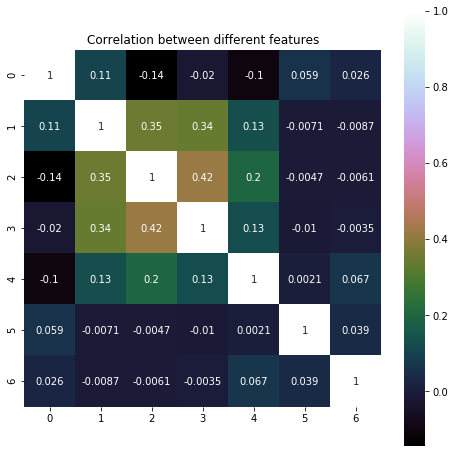

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

#**Eigen decomposition of the covariance matrix**

In [29]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n {}' .format(eig_vecs))
print('\nEigenvalues \n {}' .format(eig_vals))

Eigenvectors 
 [[-0.08797699 -0.29189921  0.27784886  0.33637135  0.79752505  0.26786864
  -0.09438973]
 [ 0.50695734  0.30996609 -0.70780994  0.07393548  0.33180877  0.1101505
  -0.13499526]
 [ 0.5788351  -0.77736008 -0.00657105 -0.19677589 -0.10338032 -0.10336241
  -0.02293518]
 [ 0.54901653  0.45787675  0.63497294 -0.25170987  0.10388959 -0.01034922
  -0.10714981]
 [ 0.31354922  0.05287224  0.12200054  0.78782241 -0.28404472  0.04036861
   0.42547869]
 [-0.01930249  0.04433104 -0.03622859 -0.05762997  0.37489883 -0.8048393
   0.45245222]
 [ 0.00996933  0.00391698 -0.04873036 -0.39411153  0.10557298  0.50589173
   0.75836313]]

Eigenvalues 
 [1.83017431 0.54823098 0.63363587 0.84548166 1.12659606 0.95598647
 1.06036136]


#**Selecting Principal Components**
In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, those are the ones can be dropped.



In [30]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.8301743138755002
1.1265960639915478
1.0603613622840853
0.9559864740066262
0.8454816637143466
0.6336358744830214
0.5482309765420618


**Explained Variance**
After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [0]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

The plot clearly shows that maximum variance (somewhere around 26%) can be explained by the first principal component alone. The second,third,fourth and fifth principal component share almost equal amount of information.Comparatively 6th component share less amount of information as compared to the rest of the Principal components.But those information cannot be ignored since they both contribute almost 17% of the data.But we can drop the last component as it has less than 10% of the variance

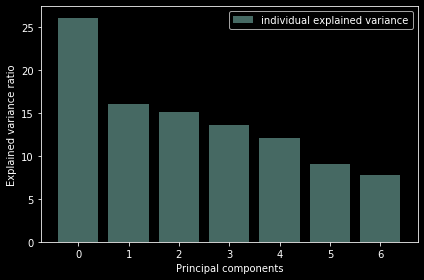

In [32]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

**Projection Onto the New Feature Space:**
In this last step we will use the 7×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation
**Y=X×W**

In [33]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1), 
                      eig_pairs[1][1].reshape(7,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.08797699  0.79752505]
 [ 0.50695734  0.33180877]
 [ 0.5788351  -0.10338032]
 [ 0.54901653  0.10388959]
 [ 0.31354922 -0.28404472]
 [-0.01930249  0.37489883]
 [ 0.00996933  0.10557298]]


In [34]:
Y = X_std.dot(matrix_w)
Y

array([[-1.90035018, -1.12083103],
       [ 2.1358322 ,  0.2493369 ],
       [ 3.05891625, -1.68312693],
       ...,
       [-2.0507165 , -1.182032  ],
       [ 2.91418496, -1.42752606],
       [-1.91543672, -1.17021407]])

The plot shows almost 90% variance by the first 6 components. Therfore we can drop 7th component.

Text(0, 0.5, 'Cumulative explained variance')

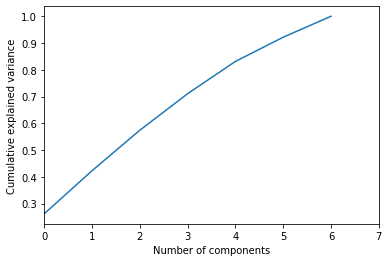

In [35]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [0]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [37]:
print(Y_sklearn)

[[-1.90035018 -1.12083103 -0.0797787   0.03228437 -0.07256447  0.06063013]
 [ 2.1358322   0.2493369   0.0936161   0.50676925  1.2487747  -0.61378158]
 [ 3.05891625 -1.68312693 -0.301682   -0.4488635  -1.12495888  0.29066929]
 ...
 [-2.0507165  -1.182032   -0.04594506  0.02441143 -0.01553247  0.24980658]
 [ 2.91418496 -1.42752606 -0.36333357 -0.31517759 -0.97107375  0.51444624]
 [-1.91543672 -1.17021407 -0.07024077  0.01486762 -0.09545357  0.01773844]]


Thus **Principal Component Analysis** is used to remove the redundant features from the datasets without losing much information.These features are low dimensional in nature.The first component has the highest variance followed by second, third and so on.PCA works best on data set having 3 or higher dimensions. Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.

In [38]:
Y_sklearn.shape

(14999, 6)